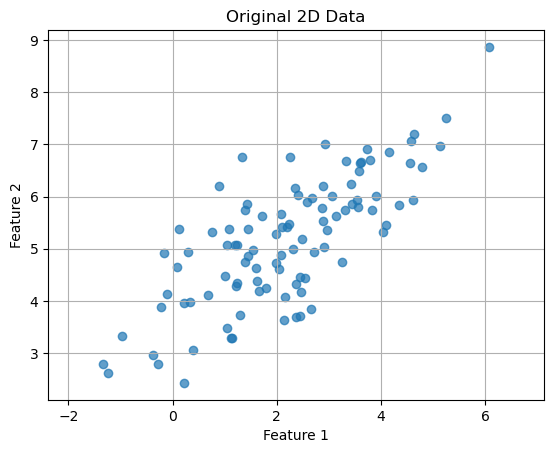

In [1]:
#Q.1
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()


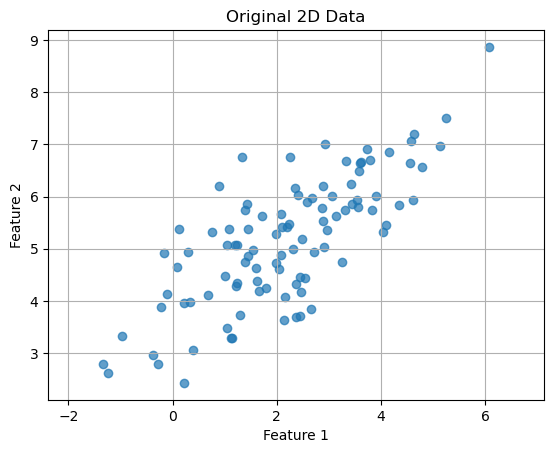

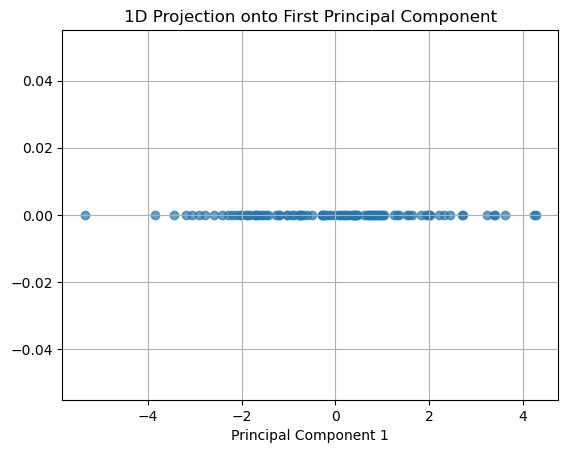

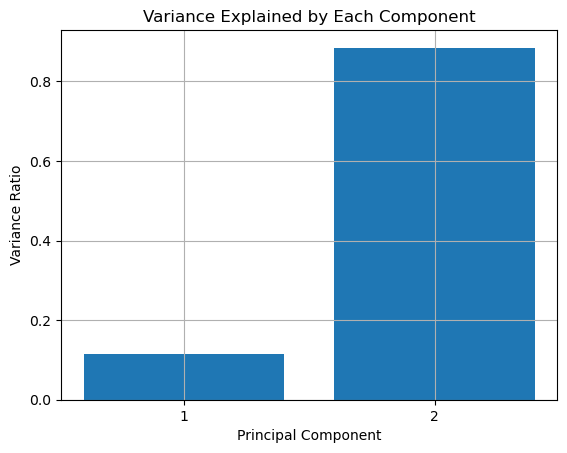

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

# Step 3: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 4: Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 5: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 6: Project onto the first principal component
pc1 = eigenvectors[:, -1]  # top component
X_pca = X_centered @ pc1

# Step 7: Plot the 1D projection
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7)
plt.title("1D Projection onto First Principal Component")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

# Step 8: Explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
plt.bar(range(1, 3), explained_variance)
plt.xticks([1, 2])
plt.title("Variance Explained by Each Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.grid(True)
plt.show()

"Ans: This graph shows the variance explained by each principal component in a 2D dataset after applying Principal Component Analysis (PCA). The second principal component (PC2) accounts for the majority of the variance—approximately 88%—while the first component (PC1) explains only about 12% of the variance. This indicates that most of the data's spread or information lies along the direction of the second principal component. Therefore, projecting the data onto this component would retain the majority of its structure, making it useful for dimensionality reduction or data visualization while minimizing information loss. "

Shape of X: (1797, 64)


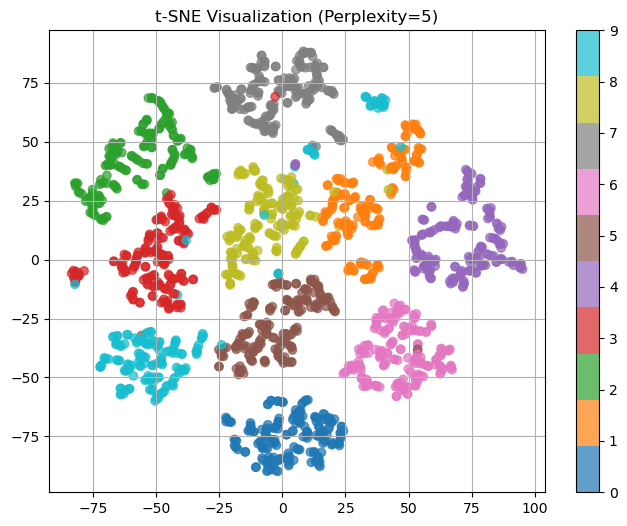

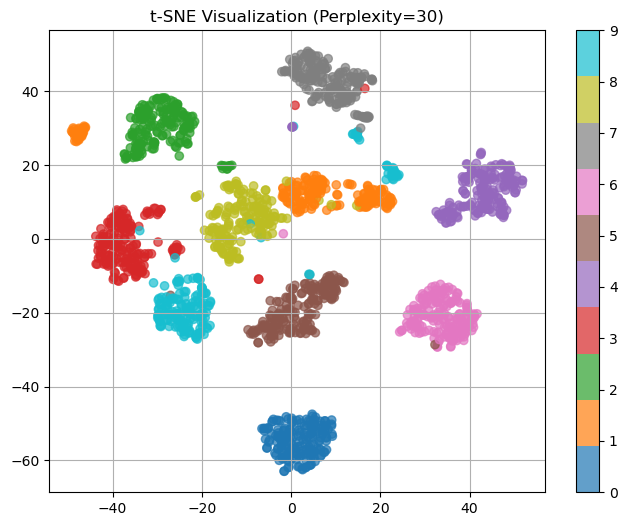

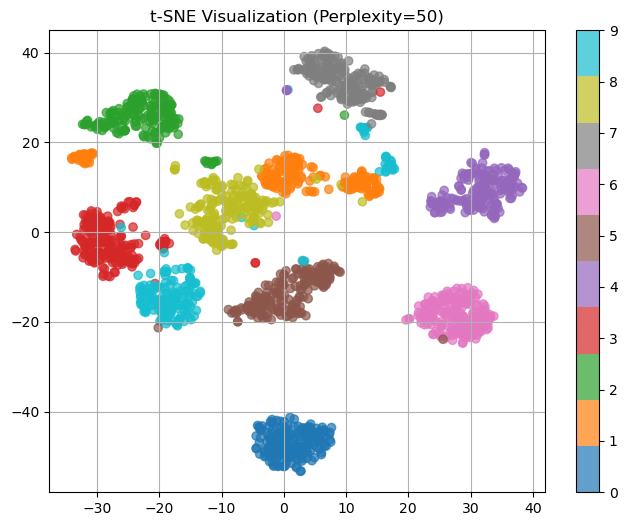

In [5]:
#Q.2
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import seaborn as sns

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

print(f"Shape of X: {X.shape}")  # (1797, 64)

# Function to plot t-SNE with different perplexity
def plot_tsne(perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.grid(True)
    plt.show()

# Try different perplexity values
for p in [5, 30, 50]:
    plot_tsne(p)
